In [3]:
# !pip install meteostat
# !pip install scipy

In [5]:
import ipywidgets
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h1>voyons à quoi a t on affaire exactement :</h1>

In [6]:
folder_cap="data\\data_capitalisation_ancien_site\\data_csv\\capitalisation.csv"
capitalisation=pd.read_csv(folder_cap)

In [7]:
capitalisation.head(-1)

,date,capitalisation
0,1/2/2008,5.985440e+11
1,1/3/2008,6.056810e+11
2,1/4/2008,6.140960e+11
3,1/7/2008,6.203390e+11
4,1/8/2008,6.222680e+11
...,...,...
3810,4/19/2023,5.449000e+11
3811,4/20/2023,5.450890e+11
3812,4/21/2023,5.454250e+11
3813,4/25/2023,5.449780e+11


In [8]:
#il faut que la colonne date soit interprétée autant que date et non comme variable catégorielle
capitalisation['date_2'] = pd.to_datetime(capitalisation['date'], format='%m/%d/%Y')

In [9]:
def evolution_capitalisation(depart:int=0,fin:int=len(capitalisation['capitalisation'])):
    plt.figure(figsize=(30,4))
    plt.title("évolution de la capitalisation boursière de la bourse de casablanca de{} à {}".format(
        str(capitalisation['date_2'][depart]),
            str(capitalisation['date_2'][fin-1]) ))
    plt.plot(capitalisation['date_2'][depart:fin],capitalisation['capitalisation'][depart:fin])
    plt.show()

ipywidgets.interact(evolution_capitalisation, 
                    depart=(0,len(capitalisation['capitalisation']),2),
                    fin=(0,len(capitalisation['capitalisation']),2)
                   )

interactive(children=(IntSlider(value=0, description='depart', max=3816, step=2), IntSlider(value=3816, descri…

<function __main__.evolution_capitalisation(depart: int = 0, fin: int = 3816)>

In [10]:
#nous allons diviser la colonne date en trois colonnes jours, mois et années
d={}
d["cap"]=list(capitalisation['capitalisation'])
d["date"]=list(capitalisation['date'])
d["date_2"]=list(capitalisation['date_2'])
d["jour"]=[]
d["mois"]=[]
d["année"]=[]
for v in capitalisation['date']:
    vals=v.split("/")
    j=int(vals[1])
    m=int(vals[0])
    a=int(vals[2])
    d["jour"].append(j)
    d["mois"].append(m)
    d["année"].append(a)
    
nd=pd.DataFrame(d)
nd.head(5)

,cap,date,date_2,jour,mois,année
0,5.985440e+11,1/2/2008,2008-01-02,2,1,2008
1,6.056810e+11,1/3/2008,2008-01-03,3,1,2008
2,6.140960e+11,1/4/2008,2008-01-04,4,1,2008
3,6.203390e+11,1/7/2008,2008-01-07,7,1,2008
4,6.222680e+11,1/8/2008,2008-01-08,8,1,2008


In [11]:
print(nd["année"].unique())

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023]


In [12]:
def evolution_annees(annee:int):
    plt.figure(figsize=(24,8))
    plt.title("évolution au titre de l'année {}".format(int(annee)))
    x=[]
    y=[]
    for rec in nd.to_dict("records"):
        if rec["année"]==annee:
            x.append(rec["date_2"])
            y.append(rec["cap"])
    plt.plot(x,y,"C1")
    plt.xticks(rotation=45)
    plt.show()

ipywidgets.interact(evolution_annees,annee=list(nd["année"].unique()) )

interactive(children=(Dropdown(description='annee', options=(2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2…

<function __main__.evolution_annees(annee: int)>

In [13]:
def evolution_annees_mois(annee:int, mois:int):
    plt.figure(figsize=(24,8))
    plt.title("évolution au titre de l'année {}".format(int(annee)))
    x=[]
    y=[]
    for rec in nd.to_dict("records"):
        if rec["année"]==annee and rec["mois"]==mois:
            x.append(rec["date_2"])
            y.append(rec["cap"])
    plt.plot(x,y,color="C3")
    plt.show()

ipywidgets.interact(evolution_annees_mois,annee=list(nd["année"].unique()) ,mois=list(nd["mois"].unique()) )

interactive(children=(Dropdown(description='annee', options=(2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2…

<function __main__.evolution_annees_mois(annee: int, mois: int)>

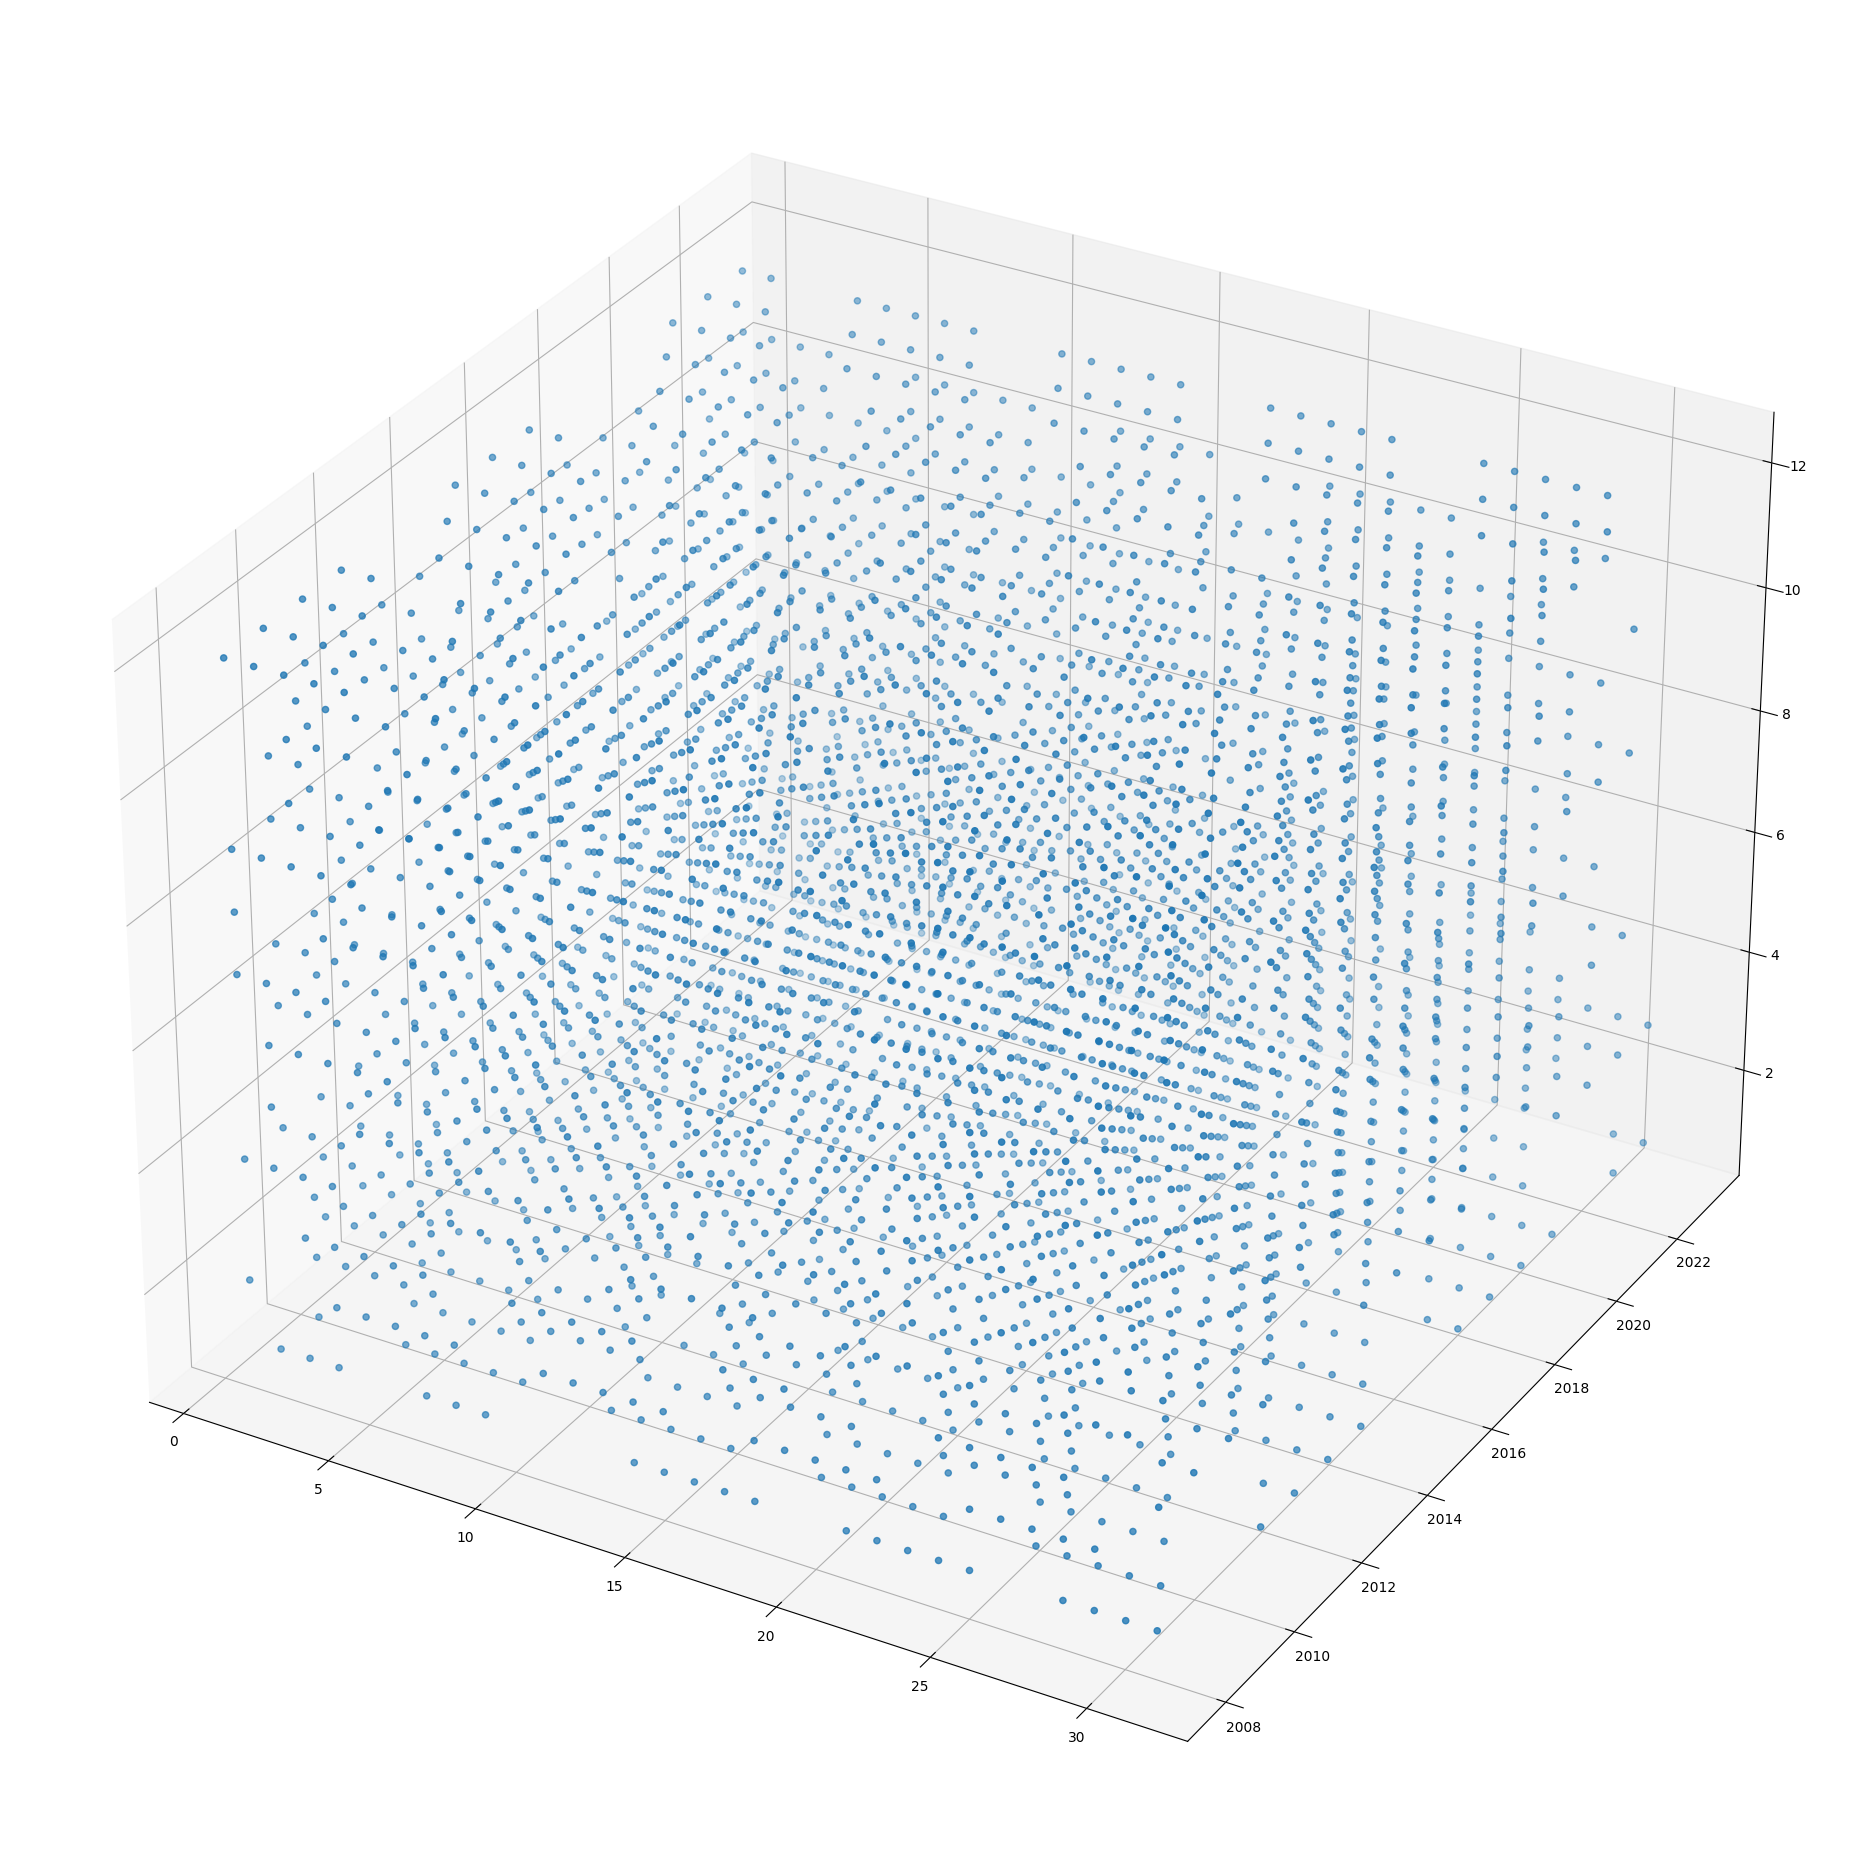

In [14]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(24,24))
ax = plt.axes(projection="3d")
x=nd["jour"]
y=nd["année"]
z=nd["mois"]
# ax.plot3D(x, y, z, 'red')

ax.scatter3D(x, y, z)
 
plt.show()

In [15]:
def plot_3D(elev=0, azim=-180):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection="3d")
    ax.view_init(elev, azim)
    
    x=nd["jour"]
    y=nd["cap"]
    z=nd["année"]
    # ax.plot3D(x, y, z, 'red')
    
    ax.scatter3D(x, y, z)
     
    plt.show()

ipywidgets.interact(plot_3D, elev=(-90, 90), azim=(-180, 180));

interactive(children=(IntSlider(value=0, description='elev', max=90, min=-90), IntSlider(value=-180, descripti…

In [16]:
def evolution_jours(jour:int):
    plt.figure(figsize=(24,8))
    plt.title("évolution au titre de l'année {}".format(int(jour)))
    x=[]
    y=[]
    for rec in nd.to_dict("records"):
        if rec["jour"]==jour:
            x.append(rec["date_2"])
            y.append(rec["cap"])
    plt.plot(x,y,"C2")
    plt.xticks(rotation=45)
    plt.show()

ipywidgets.interact(evolution_jours,jour=list(nd["jour"].unique()) )

interactive(children=(Dropdown(description='jour', options=(2, 3, 4, 7, 8, 9, 14, 15, 16, 17, 18, 21, 22, 23, …

<function __main__.evolution_jours(jour: int)>

In [17]:
def evolution_mois(moi:int):
    plt.figure(figsize=(24,8))
    plt.title("évolution au titre des mois {}".format(int(moi)))
    x=[]
    y=[]
    for rec in nd.to_dict("records"):
        if rec["mois"]==moi:
            x.append(rec["date_2"])
            y.append(rec["cap"])
    plt.plot(x,y,"C3")
    plt.xticks(rotation=45)
    plt.show()

ipywidgets.interact(evolution_mois,moi=list(nd["mois"].unique()) )

interactive(children=(Dropdown(description='moi', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1), O…

<function __main__.evolution_mois(moi: int)>

In [18]:
def evolution_jour_mois(jour:int, mois:int):
    plt.figure(figsize=(24,8))
    # plt.title("évolution au titre de l'année {}".format(int(annee)))
    x=[]
    y=[]
    for rec in nd.to_dict("records"):
        if rec["jour"]==jour and rec["mois"]==mois:
            x.append(rec["date_2"])
            y.append(rec["cap"])
    plt.plot(x,y,color="C4")
    plt.show()

ipywidgets.interact(evolution_jour_mois,jour=list(nd["jour"].unique()) ,mois=list(nd["mois"].unique()) )

interactive(children=(Dropdown(description='jour', options=(2, 3, 4, 7, 8, 9, 14, 15, 16, 17, 18, 21, 22, 23, …

<function __main__.evolution_jour_mois(jour: int, mois: int)>

<hr>
<h3>les données météorologiques</h3>

In [19]:
# from datetime import datetime
# from meteostat import Point, Daily

In [20]:
# start = datetime(2008, 8, 2) #year, month, day
# end = datetime(2023, 4, 26) #
# casa_blanaca = Point(33.57226780, -7.65703260, 70)
# data = Daily(casa_blanaca, start, end)
# data = data.fetch()
# data.plot(y=['tavg', 'tmin', 'tmax'])
# plt.show()

In [21]:
# data.head()

In [22]:
# data.to_csv("data\\data_capitalisation_ancien_site\\data_csv\\température.csv")

In [23]:
data_weather_casa=pd.read_csv("data\\data_capitalisation_ancien_site\\data_csv\\température.csv")

In [24]:
data_weather_casa['date_2'] = pd.to_datetime(data_weather_casa['time'], format='%Y-%m-%d')

In [25]:
data_weather_casa.head(3)

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,date_2
0,2008-08-02,22.4,19.0,25.6,NaN,NaN,NaN,6.4,NaN,NaN,NaN,2008-08-02
1,2008-08-03,22.8,19.4,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-03
2,2008-08-04,22.8,20.7,27.2,NaN,NaN,NaN,12.0,NaN,NaN,NaN,2008-08-04


In [26]:
dw=data_weather_casa.to_dict('list')
# print(dw)
dc=nd.to_dict("records")
# print(dc)

dd=[]
for e in dc:
    if e["date_2"] in dw["date_2"]:
        i=dw["date_2"].index(e["date_2"])
        dic={}
        dic["time"]=e["date_2"]
        dic["cap"] =e["cap"]
        dic["tavg"]=dw["tavg"][i]
        dic["tmin"]=dw["tmin"][i]
        dic["tmax"]=dw["tmax"][i]
        
        # print(e["date_2"],e["cap"],dw["tavg"][i],dw["tmin"][i],dw["tmax"][i])
        dd.append(dic)
df_cap_weat=pd.DataFrame(dd)
df_cap_weat.head(20)

,time,cap,tavg,tmin,tmax
0,2008-08-04,6.692850e+11,22.8,20.7,27.2
1,2008-08-05,6.671970e+11,22.9,21.0,26.7
2,2008-08-06,6.700330e+11,22.8,20.6,32.0
3,2008-08-07,6.684580e+11,23.5,21.5,26.4
4,2008-08-08,6.711940e+11,22.6,20.0,26.0
5,2008-08-11,6.706350e+11,22.7,20.0,25.4
6,2008-08-12,6.712820e+11,23.1,21.6,26.0
7,2008-08-13,6.678780e+11,23.0,21.0,26.0
8,2008-08-15,6.679970e+11,22.7,19.3,27.0
9,2008-08-18,6.602200e+11,22.6,20.0,25.8


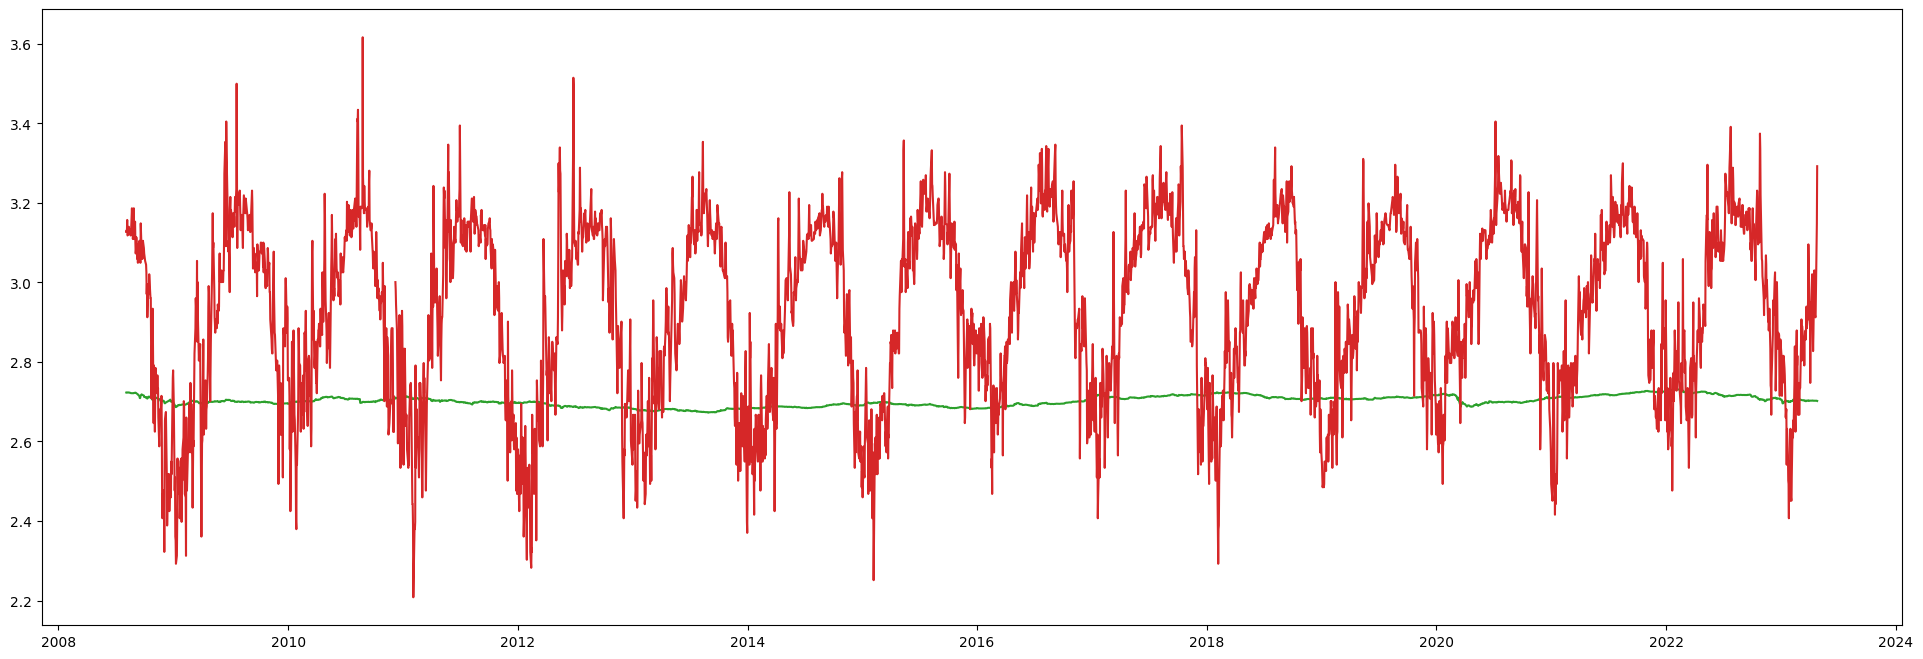

In [27]:
plt.figure(figsize=(24,8))
plt.plot(df_cap_weat["time"],np.log(df_cap_weat["cap"])/10,"C2")
avg=np.array([v for v in df_cap_weat["tavg"] ])
plt.plot(df_cap_weat["time"],np.log(avg),"C3")
plt.show()

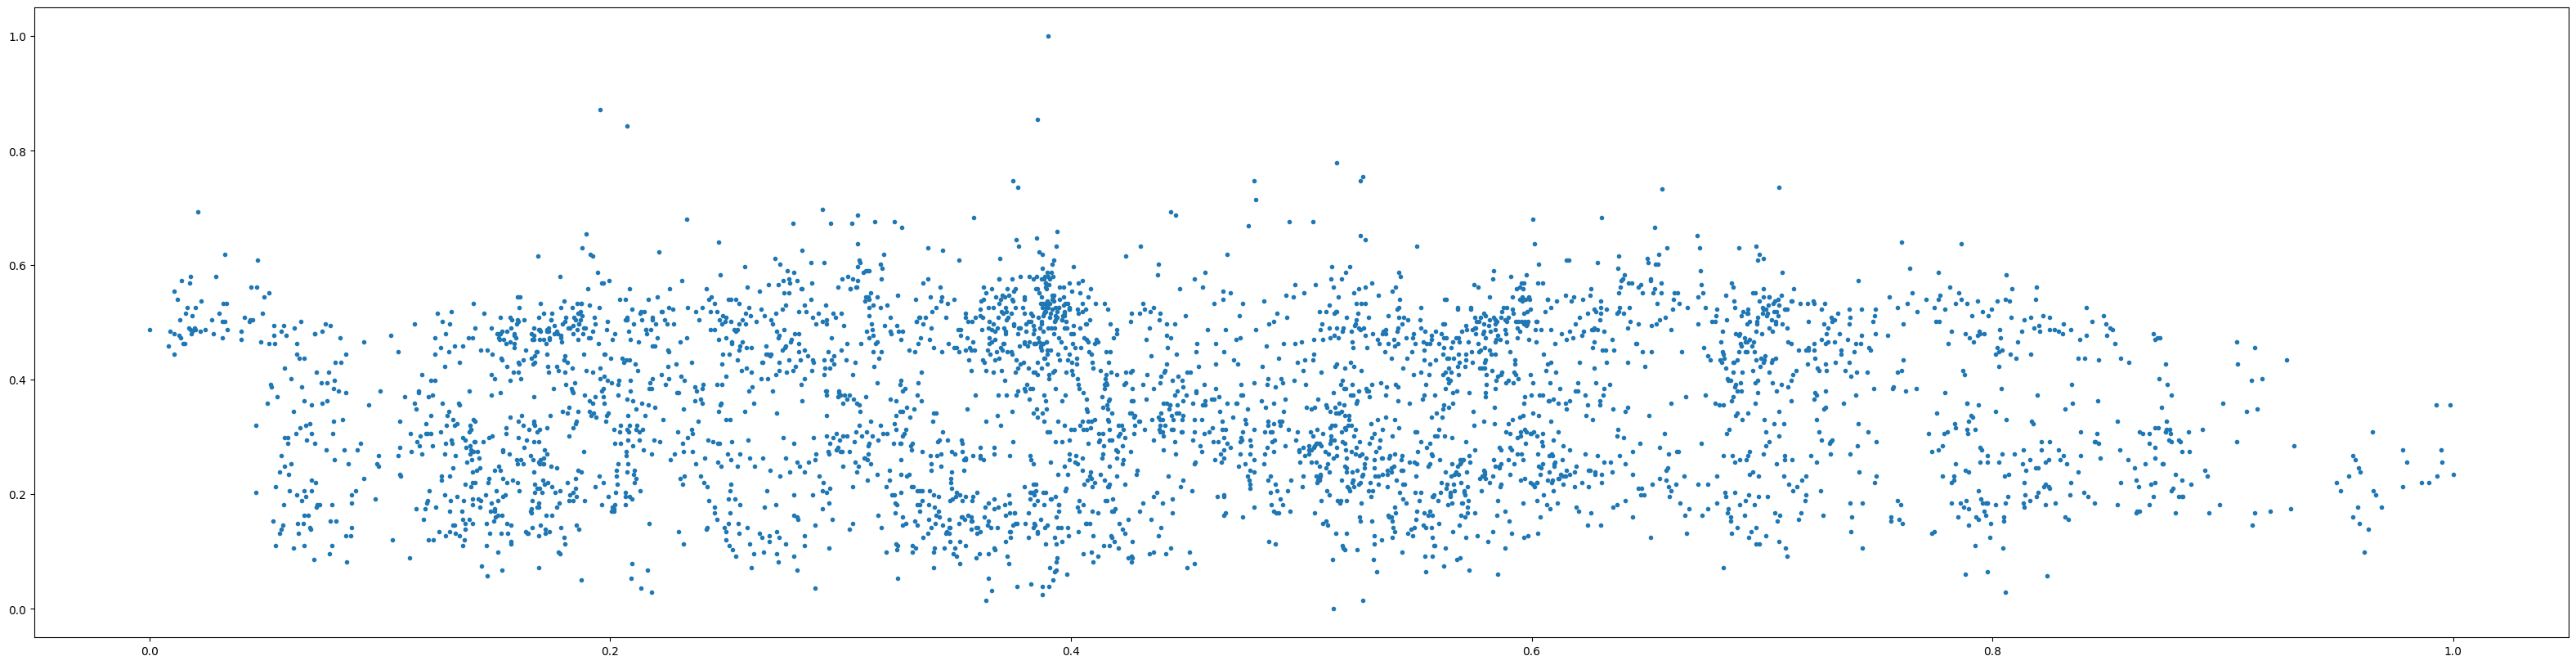

In [28]:
plt.figure(figsize=(40,10))
avg=np.array(df_cap_weat["tavg"])
min=np.array(df_cap_weat["tmin"])
max=np.array(df_cap_weat["tmax"])
# cap=np.array([df_cap_weat["cap"][x+1]- df_cap_weat["cap"][x] for x in range(len(df_cap_weat["cap"])-1)]     )
cap=np.array(df_cap_weat["cap"])

# plt.plot(cap,avg[:-1],".",color= "C1")
# plt.plot(cap,np.log(min[:-1]), ".",color= "C2")
# plt.plot(cap,np.log(max[:-1]), "*",color= "C3")

# plt.plot((avg-np.min(avg))/(np.max(avg)-np.min(avg)),np.log(cap),".",color= "C1")
mx_avg=np.nanmax(avg)
mn_avg=np.nanmin(avg)
navg=(avg-mn_avg)/(mx_avg-mn_avg)
# print(mn,mx)
# plt.plot(navg,".",color= "C1")

mx_cap=np.nanmax(cap)
mn_cap=np.nanmin(cap)
ncap=(cap-mn_cap)/(mx_cap-mn_cap)
# print(mn,mx)
# plt.plot(ncap,".",color= "C2")
plt.plot(ncap,navg,".",color= "C0")
plt.show()

In [29]:
np.convolve(ncap, [0.1, 0.1, 0.1])

array([0.08246156, 0.16427435, 0.24696833, ..., 0.13084615, 0.08687002,
       0.04303279])

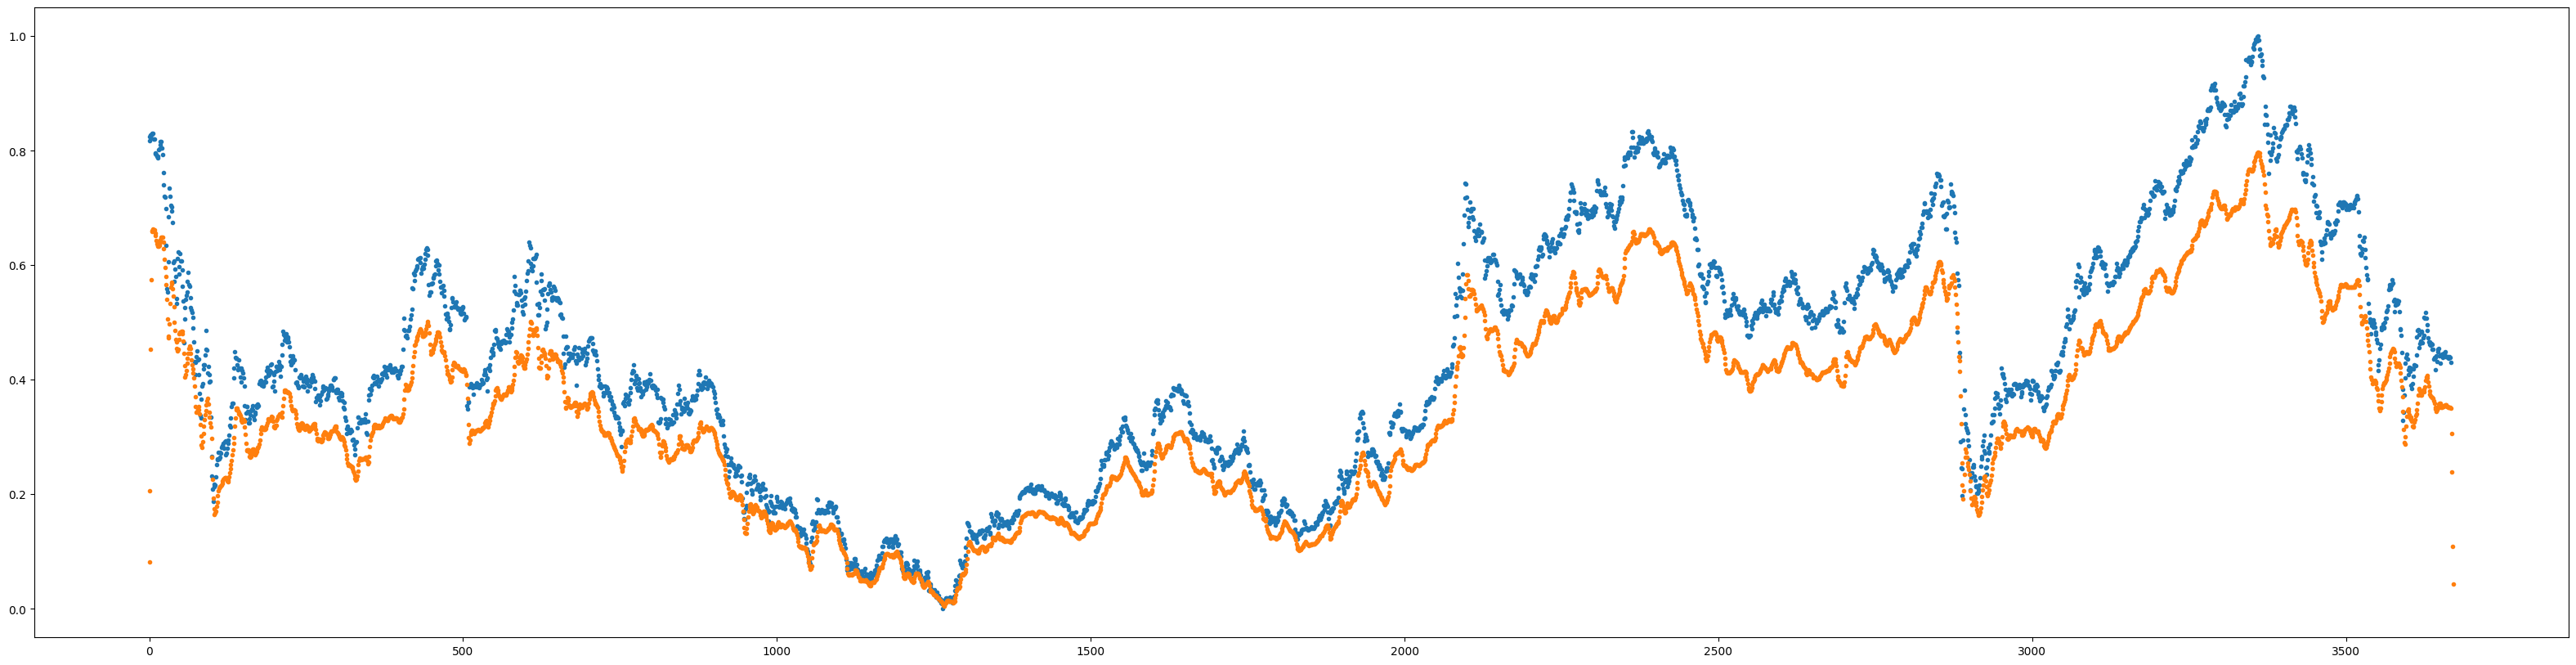

3668 3672


In [30]:
plt.figure(figsize=(40,10))
cncap=np.convolve(ncap, [0.1,0.15,0.3,0.15, 0.1])
plt.plot(ncap,".",color= "C0")
plt.plot(cncap,".",color= "C1")
plt.show()
print(len(ncap), len(cncap)  )

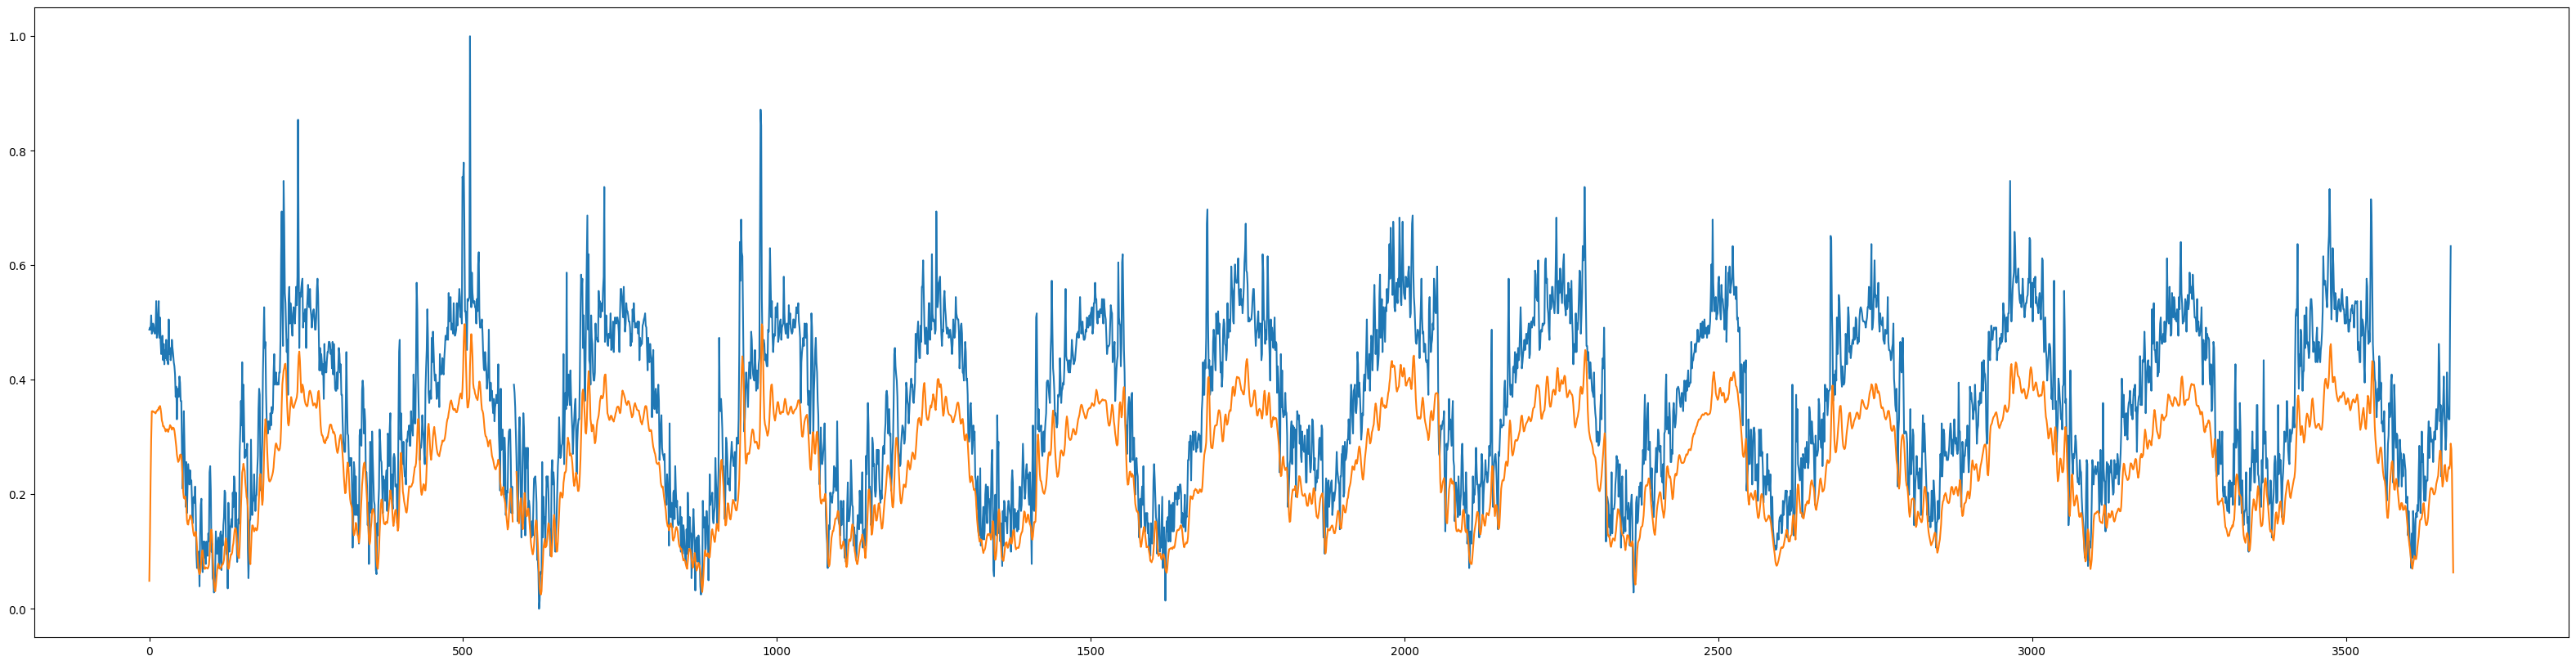

3668 3672


In [31]:
plt.figure(figsize=(40,10))
cnavg=np.convolve(navg, [0.1,0.15,0.2,0.15, 0.1])
plt.plot(navg,color= "C0")
plt.plot(cnavg,color= "C1")
plt.show()
print(len(navg), len(cnavg)  )

<h1>cette approche de voir les données comme matrice peux s'avérer prometteuse </h1>

In [32]:
def normalisation(signale):
    max=np.nanmax(signale)
    min=np.nanmin(signale)
    return (signale-min)/(max-min)

ncap=normalisation(signale=np.array(capitalisation["capitalisation"]))

In [33]:
def plot_as_matrix(depart:int=0,taille:int=10):
    if depart+taille**2 <len(ncap):
        plt.figure(figsize=(5,5))
        vals=ncap[depart:depart+taille**2]
        vals=vals.reshape(taille,taille)
        plt.imshow(vals)
        plt.colorbar()
        plt.show()

ipywidgets.interact(plot_as_matrix, 
                    depart=(0,len(ncap)-1,1),
                    taille=(2,64,2)
                   )

interactive(children=(IntSlider(value=0, description='depart', max=3815), IntSlider(value=10, description='tai…

<function __main__.plot_as_matrix(depart: int = 0, taille: int = 10)>

<h1>essayons d'explorer la filtration spectrale</h1>

considérons dans un moment notre fonction capitalisation comme un signale qu'il faut traiter<br>
une notion importante :<br>
<b>la transformée de Fourier:<b><br>
<p style="font-size : 20px">$F(f):s\mapsto \hat{f}(s) = \int_{-\infty}^{+\infty} f(t)\, e^{-i st}\, dt$</p><br>
<b>sa transformée de Inverse:<b><br>
<p style="font-size : 20px">$f(t) = {1 \over 2\pi}\, \int_{-\infty}^{+\infty} F(w)\, e^{iwt}\, dw$</p><br>

In [34]:
def normalisation(signale):
    max=np.nanmax(signale)
    min=np.nanmin(signale)
    return (signale-min)/(max-min)

In [35]:
folder_cap="data\\data_capitalisation_ancien_site\\data_csv\\capitalisation.csv"
cap=pd.read_csv(folder_cap)
cap['date_2'] = pd.to_datetime(cap['date'], format='%m/%d/%Y')
cap.head(2)

,date,capitalisation,date_2
0,1/2/2008,5.985440e+11,2008-01-02
1,1/3/2008,6.056810e+11,2008-01-03


In [36]:
c=cap["capitalisation"]
c=normalisation(c)

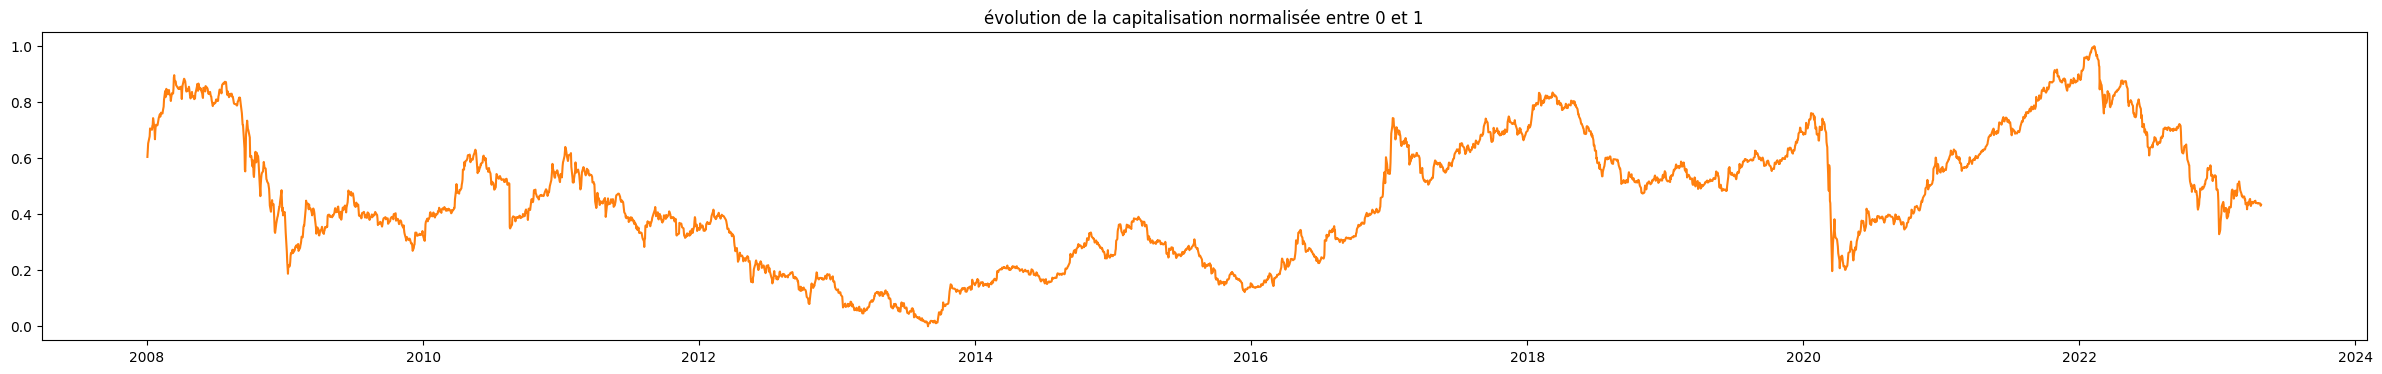

In [37]:
plt.figure(figsize=(30,4))
plt.title("évolution de la capitalisation normalisée entre 0 et 1")
plt.plot(cap['date_2'],c, color="C1")
plt.show()

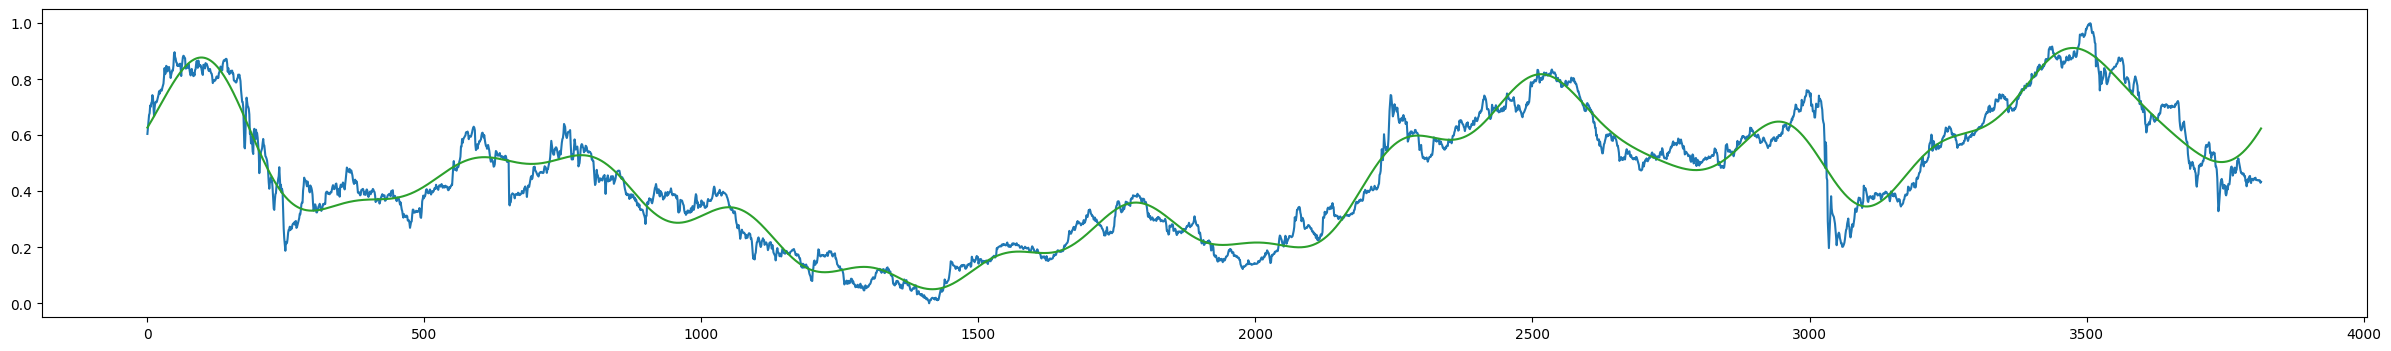

In [56]:
from scipy import fftpack 
c=np.array(c)

fourrier  = fftpack.fft(c)

power     = np.abs(fourrier)
frequences= fftpack.fftfreq(c.size)


frequences=np.abs(frequences)
# plt.plot(frequences, power)
# plt.show()

fourrier[power < 50]=0
# fourrier[power > 120]=0
# fourrier[int(len(fourrier)/2) :]=0

# plt.plot(frequences, np.abs(fourrier))
cf=fftpack.ifft(fourrier)

plt.figure(figsize=(30,4))
plt.plot(c, color="C0")
plt.plot(np.abs(cf), color="C2")
plt.show()

In [45]:
for i in range(len(power)):
    if power[i]>=50:
        print(frequences[i], power[i])

0.0 1740.6231900719622
0.0002620545073375262 451.2327499802057
0.0005241090146750524 133.95693431438
0.0007861635220125787 156.09984690252026
0.0010482180293501049 171.51927468346096
0.001310272536687631 100.22291003301315
0.0018343815513626835 149.55587971040595
0.0020964360587002098 111.2222292413287
0.002358490566037736 77.20735497758831
0.002882599580712788 85.62578526673316
0.0031446540880503146 58.549648604586245
0.0041928721174004195 80.01107571959234
0.0041928721174004195 80.01107571959234
0.0031446540880503146 58.549648604586245
0.002882599580712788 85.62578526673316
0.002358490566037736 77.20735497758831
0.0020964360587002098 111.2222292413287
0.0018343815513626835 149.55587971040595
0.001310272536687631 100.22291003301315
0.0010482180293501049 171.51927468346096
0.0007861635220125787 156.09984690252026
0.0005241090146750524 133.95693431438
0.0002620545073375262 451.2327499802057


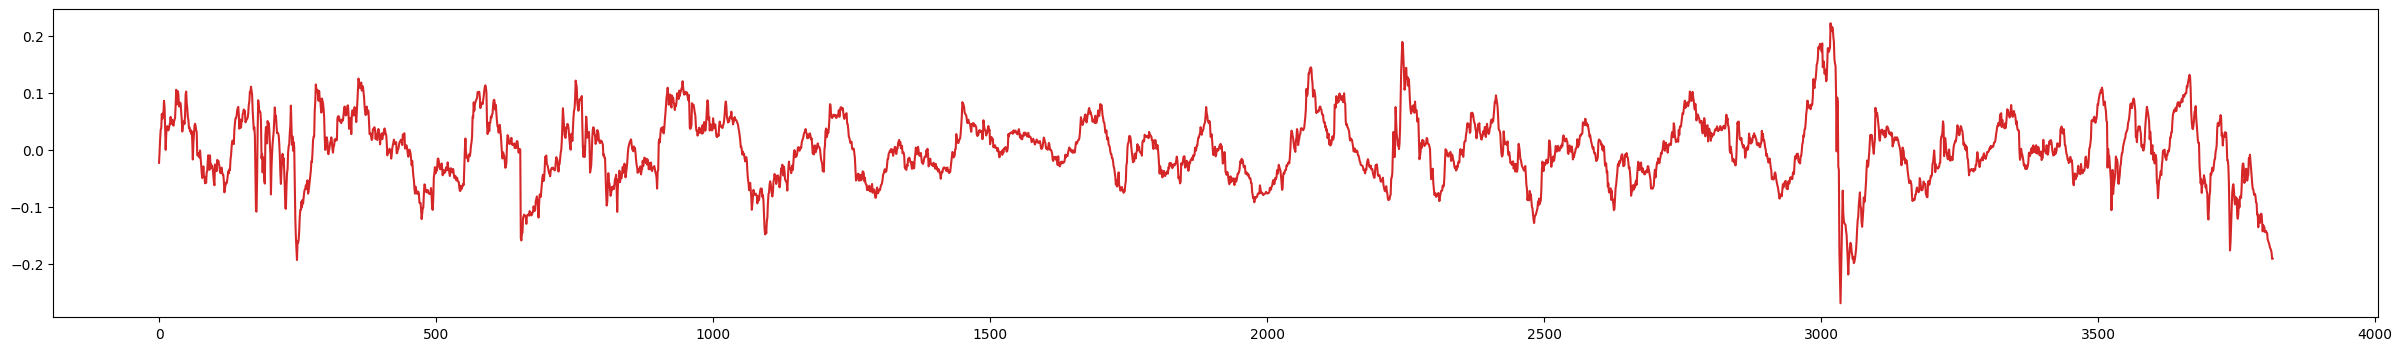

In [40]:
#tracé de la capitalisation après detrend
plt.figure(figsize=(30,4))
plt.plot(c-np.abs(cf), color="C3")
plt.show()

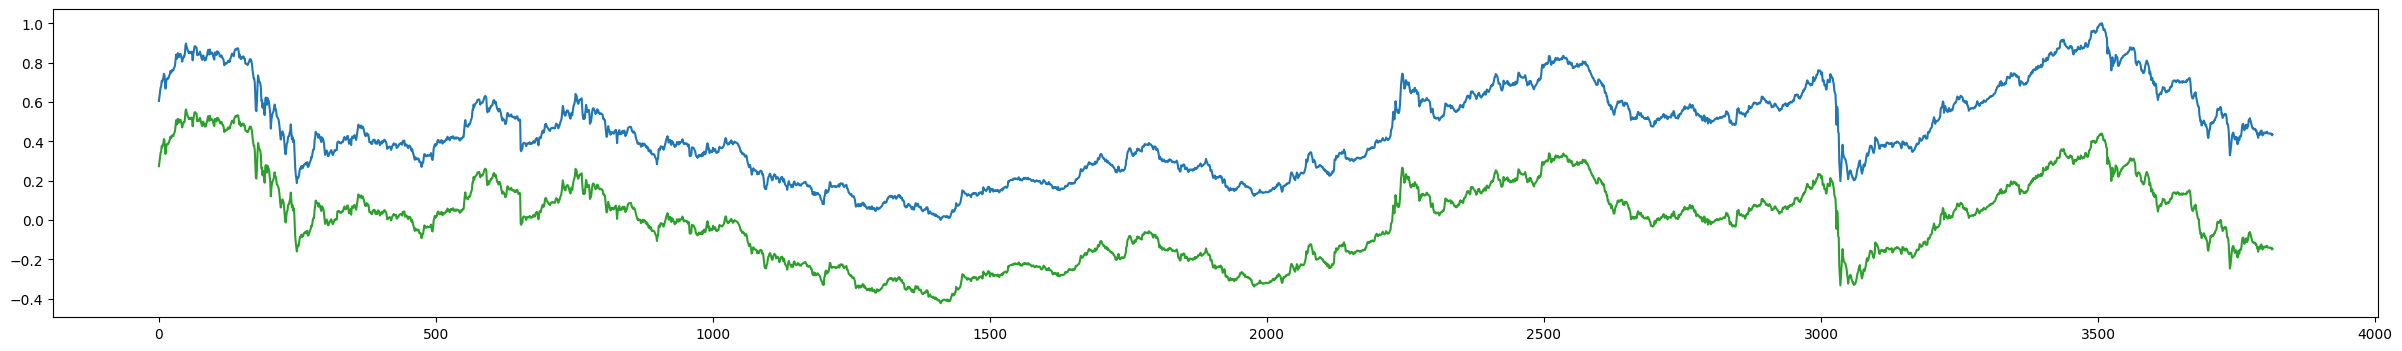

In [41]:
from scipy import signal
nc=signal.detrend(c, type="linear")
plt.figure(figsize=(30,4))
plt.plot(c, color="C0")
plt.plot(nc, color="C2")
plt.show()

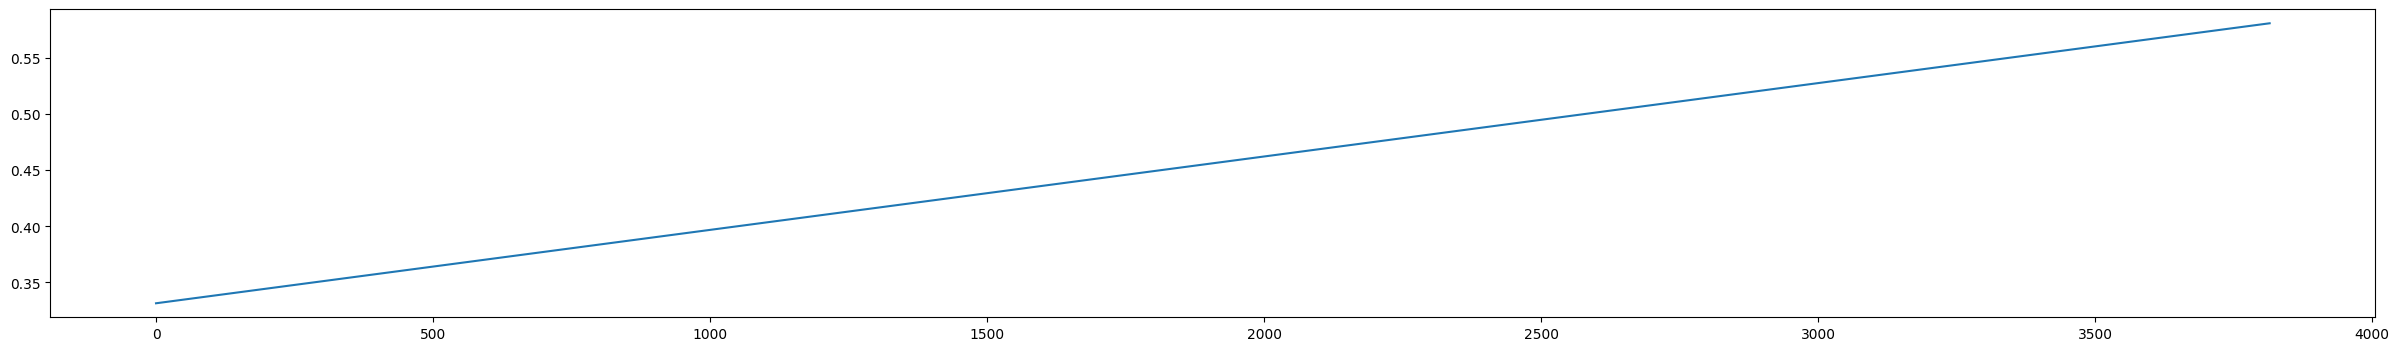

In [42]:
plt.figure(figsize=(30,4))
plt.plot(c-nc, color="C0")

<h1>commençons nos tests statistiques</h1>

In [47]:
# !pip install statsmodels

In [48]:
from statsmodels.tsa.stattools import adfuller

def normalisation(signale):
    max=np.nanmax(signale)
    min=np.nanmin(signale)
    return (signale-min)/(max-min)
    
# Effectuer le test ADF
def adfuller_test(data):
    result = adfuller(data)
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    
    print("ADF Statistic:", adf_statistic)
    print("p-value:", p_value)
    print("Critical Values:", critical_values)

In [49]:
adfuller_test(data=c)

ADF Statistic: -2.3866120268947983
p-value: 0.14555077329370264
Critical Values: {'1%': -3.4320724859265566, '5%': -2.86230109957308, '10%': -2.567175143302213}


In [50]:
adfuller_test(data=nc)

ADF Statistic: -2.674587297890586
p-value: 0.07853995230768701
Critical Values: {'1%': -3.4320724859265566, '5%': -2.86230109957308, '10%': -2.567175143302213}


In [51]:
adfuller_test(data=c-np.abs(cf))

ADF Statistic: -8.95994513668422
p-value: 8.276483090928157e-15
Critical Values: {'1%': -3.432078861405308, '5%': -2.862303915831184, '10%': -2.567176642573323}


In [52]:
df=pd.DataFrame(
    {
        "date" : cap["date_2"],
        "capitalisation" :  cap["capitalisation"],
        "cap_normalisee" : c,
        "fourrier": np.abs(cf),
        "cap_moins_fourrier"   : c-np.abs(cf)
    }
)

df.head(20)

,date,capitalisation,cap_normalisee,fourrier,cap_moins_fourrier
0,2008-01-02,5.985440e+11,0.604811,0.627546,-0.022735
1,2008-01-03,6.056810e+11,0.626987,0.630788,-0.003801
2,2008-01-04,6.140960e+11,0.653134,0.634056,0.019078
3,2008-01-07,6.203390e+11,0.672532,0.637350,0.035182
4,2008-01-08,6.222680e+11,0.678526,0.640667,0.037858
5,2008-01-09,6.312690e+11,0.706493,0.644008,0.062485
6,2008-01-14,6.297450e+11,0.701758,0.647371,0.054387
7,2008-01-15,6.340110e+11,0.715013,0.650755,0.064259
8,2008-01-16,6.353910e+11,0.719301,0.654158,0.065143
9,2008-01-17,6.431290e+11,0.743344,0.657580,0.085764


In [53]:
# enregistrer le nouveau dataset 
# folder_cn="data\\data_capitalisation_ancien_site\\data_csv\\capitalisation_analysee.csv"
# df.to_csv(folder_cn)